Exempo polynomial

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

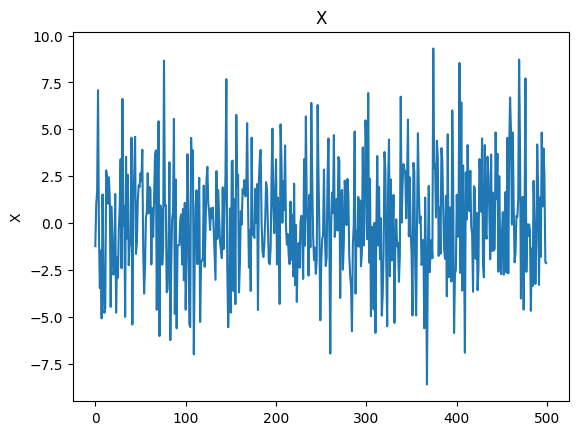

In [ ]:
data = pd.read_parquet("exemplo_poly_data.parquet")

x = data.x
y = data.y

plt.plot(x)
plt.title("X")
plt.ylabel('X')
plt.show()



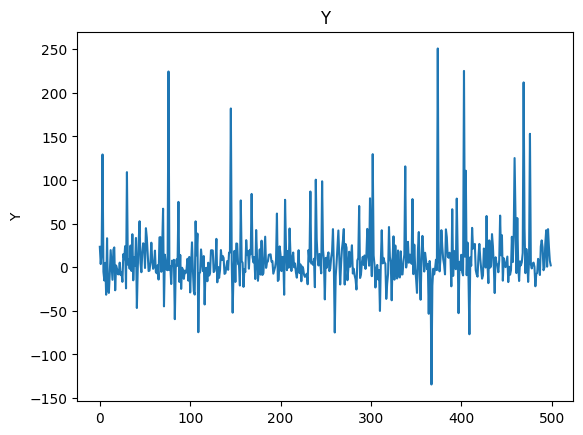

In [ ]:
plt.plot(y)
plt.title("Y")
plt.ylabel('Y')
plt.show()

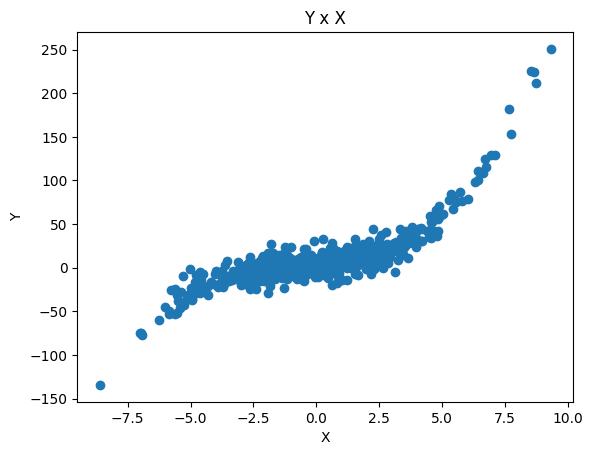

In [ ]:
plt.scatter(x, y)
plt.title("Y x X")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     1856.
Date:                Tue, 26 Sep 2023   Prob (F-statistic):          3.77e-269
Time:                        00:14:23   Log-Likelihood:                -1855.9
No. Observations:                 500   AIC:                             3720.
Df Residuals:                     496   BIC:                             3737.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5976      0.550      6.541      0.0

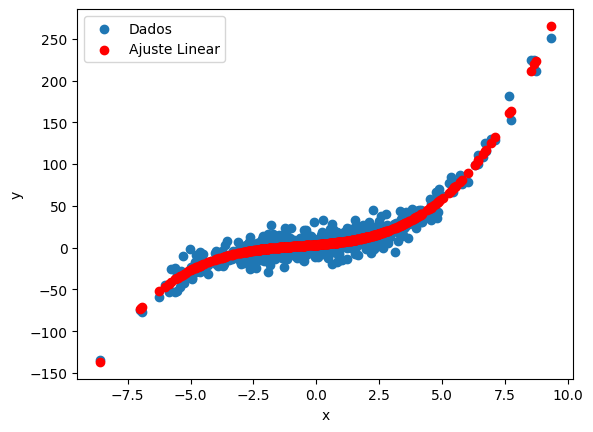

In [ ]:
x_df = pd.DataFrame({'x^1':x})
x_df = pd.DataFrame({'x^1':x, 'x^2':x**2, 'x^3':x**3})
x1 = sm.add_constant(x_df)
modelo = sm.OLS(y,x1).fit()
print(modelo.summary())

# # Visualizar os dados e a linha de ajuste
plt.scatter(x, y, label='Dados')
plt.scatter(x, modelo.predict(x1), color='red', label='Ajuste Linear')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

caso1: y = 8.92 + 9.35 * x      (R<sup>2</sup>: 0.644, AIC: 4451)

caso2: y = 1.10 + 8.72 *x + 0.89 * x<sup>2</sup>      (R<sup>2</sup>: 0.747, AIC: 4283)

caso3: y = 3.59 + 2.51 *x + 0.49 * x<sup>2</sup> + 0.24 * x<sup>3</sup>
     (R<sup>2</sup>: 0.918, AIC: 3720)

Suponha que estamos analisando os custos médios de produção de uma fábrica de calçados esportivos. Vamos criar um conjunto de dados fictícios com quantidades produzidas (Q) e seus custos médios de produção (CMe):

$$CMe(Q)= b_0 + b_1Q + b_2Q^2$$

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     85.97
Date:                Tue, 26 Sep 2023   Prob (F-statistic):           1.18e-05
Time:                        00:17:39   Log-Likelihood:               0.069693
No. Observations:                  10   AIC:                             5.861
Df Residuals:                       7   BIC:                             6.768
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.4373      0.481     32.113      0.0

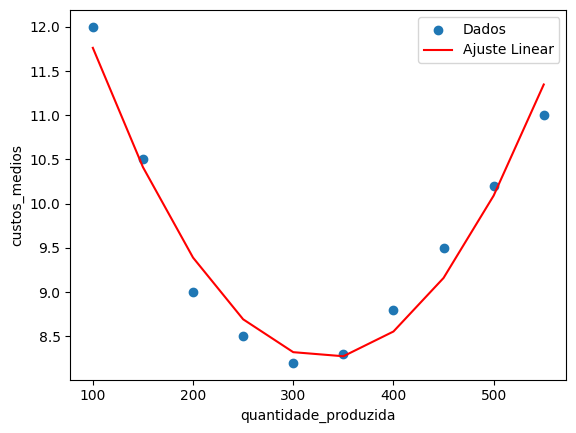

In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Quantidades produzidas
quantidade_produzida = np.array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550])

# Custos médios de produção (em dólares por par de sapatos)
custos_medios = np.array([12, 10.5, 9, 8.5, 8.2, 8.3, 8.8, 9.5, 10.2, 11])


# Adicionar termos polinomiais
X = sm.add_constant(quantidade_produzida)
X = np.column_stack((X, X[:, 1]**2))

# Ajustar o modelo
modelo = sm.OLS(custos_medios, X).fit()

# Obter os coeficientes do modelo
print(modelo.summary())

# Visualizar os dados e a linha de ajuste
plt.scatter(quantidade_produzida, custos_medios, label='Dados')
plt.plot(quantidade_produzida, modelo.predict(X), color='red', label='Ajuste Linear')
plt.xlabel('quantidade_produzida')
plt.ylabel('custos_medios')
plt.legend()
plt.show()


## **Exercício: Encontrando o Preço Ótimo de um produto usando regressão polinomial do lucro contra o preço**

Considere um conjunto de dados que relaciona a quantidade vendida de um produto (quant), o preço do produto (preco) e o lucro obtido (Lucro).

Além disso considere o modelo abaixo:

$$ Receita_{total} = preco * quantidade $$
$$ Custo_{total} = custo_{fixo} + custo_{variavel} * quantidade $$

$$ Lucro = Receita_{total} - Custo_{total} $$

Curva de demanda da quantidade é:

$$quantidade = \beta_{0,q} + \beta_{1,q} * preco $$

**Dicas**

1o passo: construa o model de lucro em função do preco $$ Lucro = f(preco) $$

2o passo: obtenha o modelo de preço ótimo (preco*). Qual é o preço que maximiza o Lucro?

2o passo: encontre os coeficientes dessa função usando regressão polinomial do Lucro x preco

3o passo: faça a regressão da quantidade com o preço

4o passo: use os coeficientes para calcular o quantidade ótima.

5o passo: Baseado no preco otimo e nos coeficientes calulados, obtenha o custo total, a receita total, o lucro e a quantidade vendida.


In [ ]:
import pandas as pd
import statsmodels.api as sm

lucro_data = pd.read_parquet("lucro_data.parquet")

X = pd.DataFrame({'X^1':lucro_data["Preco"],'x^2':lucro_data["Preco"]**2})
X = sm.add_constant(X)
Y = lucro_data["Lucro"]

modelo = sm.OLS(Y,X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  Lucro   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.067e+04
Date:                Thu, 28 Sep 2023   Prob (F-statistic):          9.27e-105
Time:                        00:35:33   Log-Likelihood:                -676.64
No. Observations:                  90   AIC:                             1359.
Df Residuals:                      87   BIC:                             1367.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5099.1878    146.580    -34.788      0.0

$$ L = -5099 + 103.34P - 0.09*P^2 $$

$$ dL/DP = 103.34 - 2*0.09*P = 0 $$
$$ P^* = 103.34/2*0.09 = 527.79 $$



In [ ]:
X = lucro_data["Preco"]
X = sm.add_constant(X)
Y = lucro_data['Quantidade']

modelo = sm.OLS(Y,X).fit()
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:             Quantidade   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 7.376e+04
Date:                Thu, 28 Sep 2023   Prob (F-statistic):          1.91e-130
Time:                        00:39:36   Log-Likelihood:                -117.90
No. Observations:                  90   AIC:                             239.8
Df Residuals:                      88   BIC:                             244.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.9397      0.193    518.620      0.0

$$ Quantidade = 100 - 0.099 * Preco $$
$$ Q^* = 100 - 0.099 * 527.79  = 47$$ (47 ou 48)




In [ ]:
RT = 527.79 * 48
print("RT: ", RT)
P = 527.79
Lucro = -5099 + 103.34 * P - 0.098 * (P**2)
print("Lucro: ", Lucro)

print("CT: ",RT - Lucro)

RT:  25333.92
Lucro:  22143.7147582
CT:  3190.2052417999985


Lucro = RT - CT -> CT = RT - Lucro